# Topic 3. Algebraic data types

## 3.1 Functions

This is a small introduction to functions from the point of view of functional programming _and_ software engineering. It ends with a discussion about the algebraic nature of functions and the basic way in which functions are represented in an object-oriented programming language like Scala. 

These are the goals of this section:

* Understanding the difference between impure vs. pure functions: the main tenet of functional programming
* Understanding how functions act as a modularity mechanism: the software engineering perspective
* Introducing functions as values: enabling higher-order functions
* Currying and composition: HOFs in action as modularity mechanism
* Understanding _generic_ signatures: parametric polymorphism as another modularity mechanism
* Understanding the algebraic nature of functions
* Knowing how Scala represents function-values and different syntactic niceties


## What are (pure) functions?

Functions are computational devices that transform input _values_ into output _values_, and do nothing _else_.

In [10]:
// `add one` function
def addOne(x: Int): Int = 
    x+1

defined function addOne

If we run this function, the only thing that happens is the computation of a new value:

In [11]:
addOne(6)

res11: Int = 7

Functions that do something else, besides returning values, are called _impure_ functions. Functional programming deals only with _pure_, or mathematical, functions. For instance, this is not a pure function:

In [12]:
// An impure function
def impureAdd(input: Int): Int = 
    println("Sumando 1 a " + input)
    input + 1

defined function impureAdd

If we run this function, we will see an _effect_ in the console (besides the pure computation of `input + 1`): 

In [13]:
impureAdd(5)

Sumando 1 a 5


res13: Int = 6

There are many kinds of effects: writing to the console, reading from the keyboard, reading from a socket, calling a web service, executing a query over the database, updating a global variable, etc. Clearly, we need effects if we want our programs to do something useful, so pure functions alone are not enough. We will talk about this later on.

#### Exercise
<div class="alert alert-info">
    Given the following program, evaluate whether it is pure or impure, and specify the type of side effect if the program is considered impure.
</div>

In [19]:
val j: Int = 0

j: Int = 0

In [20]:
j

res20: Int = 0

In [20]:
j = j+1

-- [E052] Type Error: cmd21.sc:1:14 --------------------------------------------
1 |val res21 = j = j+1
  |            ^^^^^^^
  |            Reassignment to val j
  |
  | longer explanation available when compiling with `-explain`
Compilation Failed

In [27]:
var i: Int = 0

def power(n: Int, m: Int): Int = 
    i += 1
    return scala.math.pow(n, m).toInt

i: Int = 0
defined function power

In [17]:
power(5, 6)

res17: Int = 15625

In [18]:
i

res18: Int = 2

##### Solution

The function is impure since it does something else to simple calculating the power of two numbers: it updates the global variable `i` each time the function executes.

##### Your solution

// write you solution here




## Functions as modularity devices

Modularity can be explained in reference to the process whereby we refactor a piece of monolythic code in order to obtain a better design (one with better reusability guarantees, undertandability, maintenance, etc.). A monolyth is characterised by a number of intermingled features, represented in the image by blue, red and green _spaghetti_. The important thing is that the blue concern is repeated in programs _p1_ and _p2_, not only conceptually, but physically - in the sense that this code is copy-pasted. How could we design these components so that we can reuse this blue concern? We can abstract that blue concern in a new abstract module, and design components _p1_ and _p2_ in a more modular way combining this new reusable module with the red and green concerns. 

The important thing to remember is that a modular component is characterised by being made of different subcomponents that implement different concerns. 

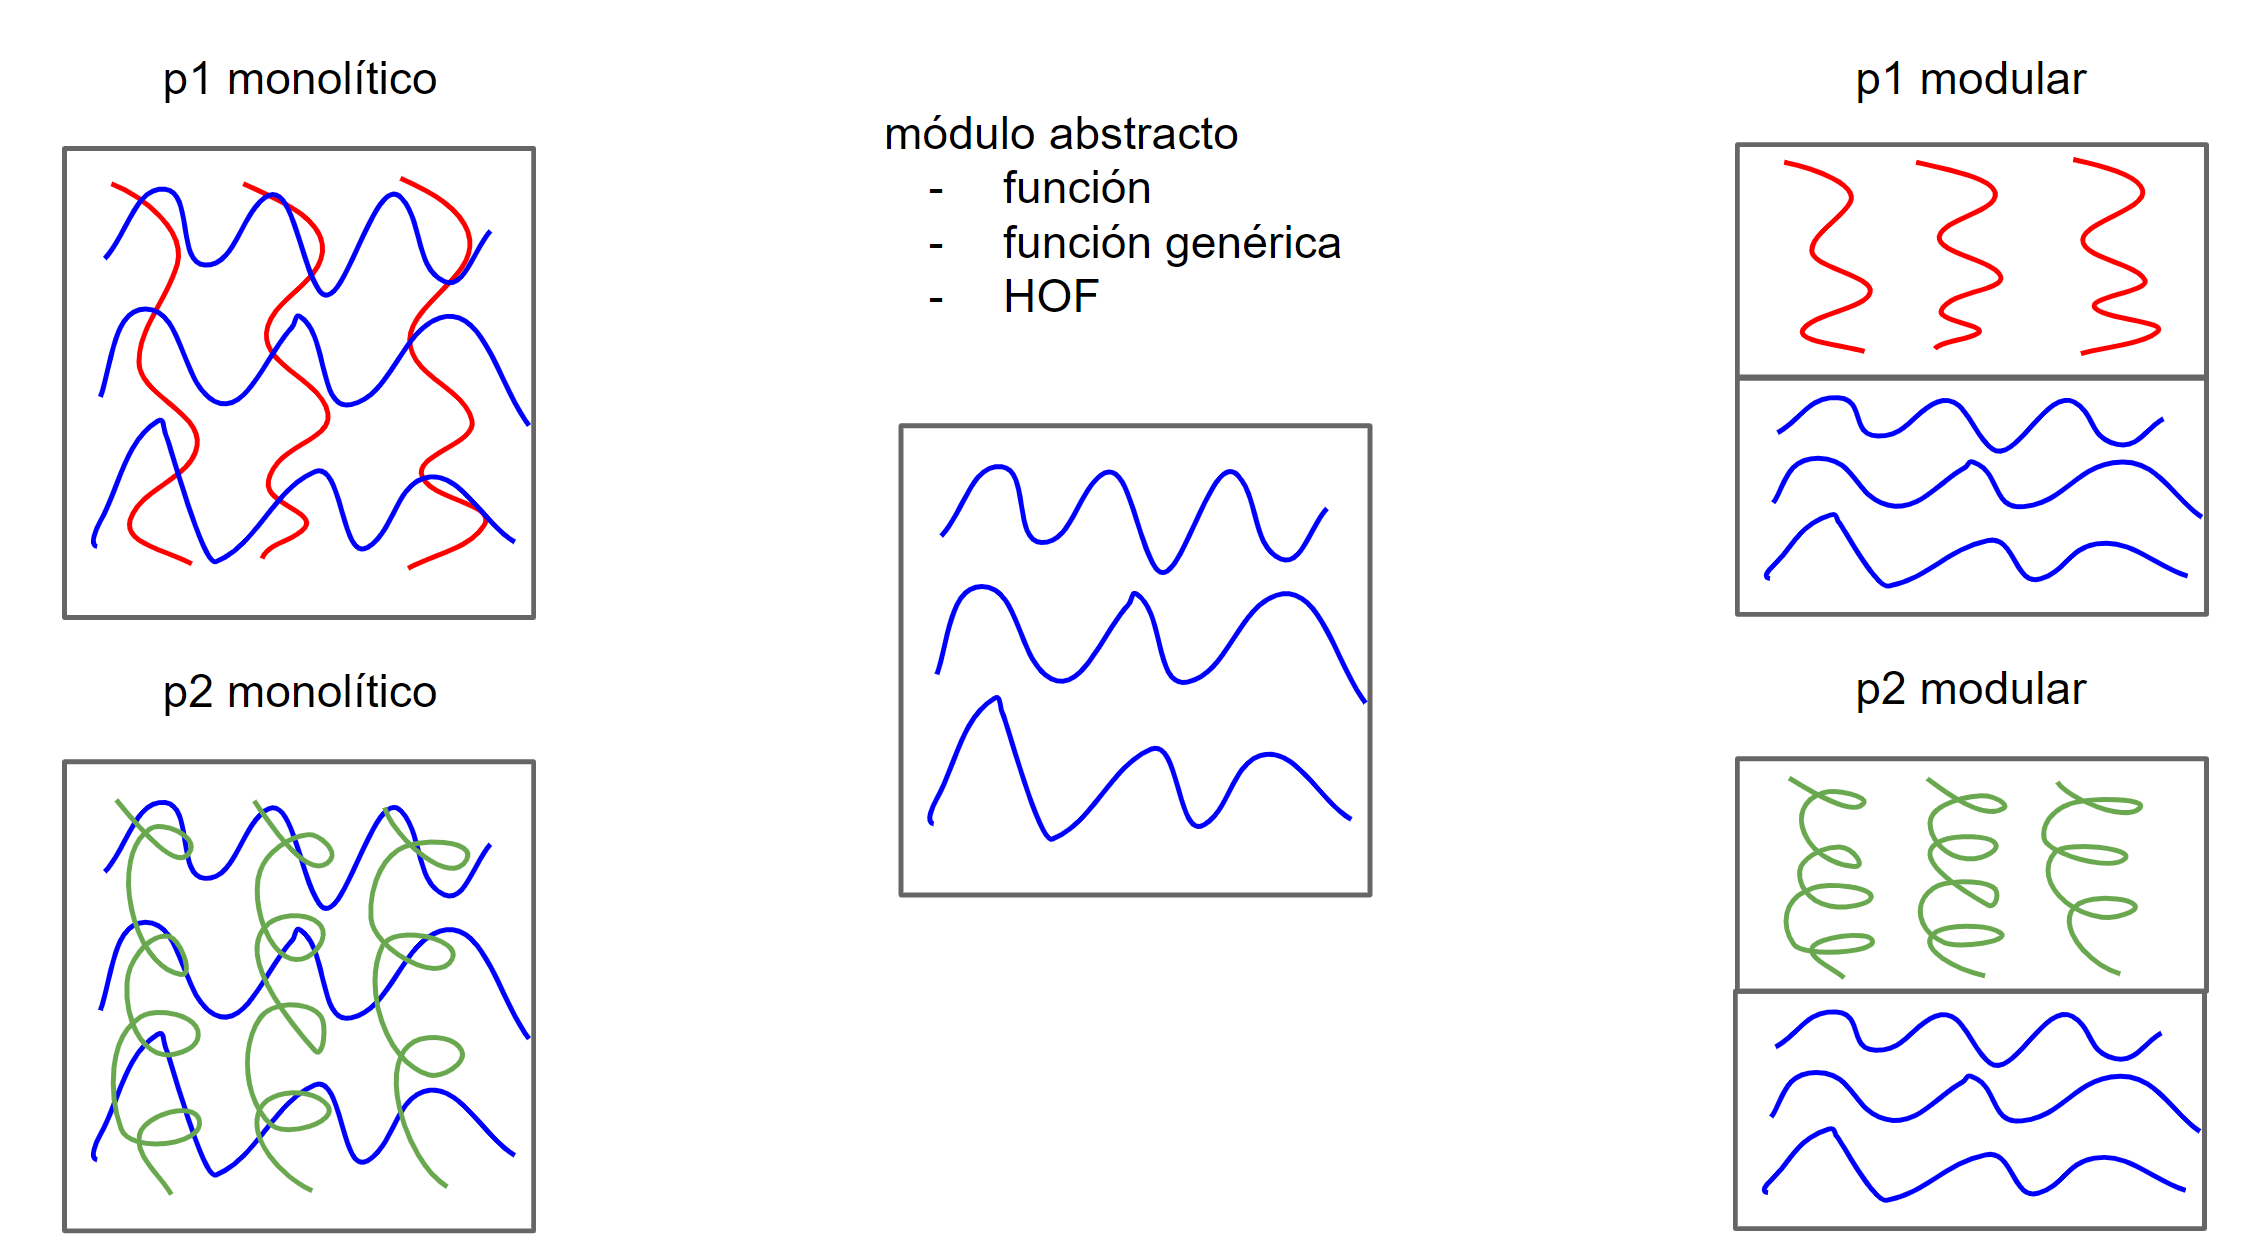

Why are functions so important in programming? Because they help us to _modularize_ our code; they are modularity devices. For instance, let's consider the following programs, which access the following data structure of key-value pairs (we will talk about this structure in detail later on):

In [21]:
val config: Map[String, String] = 
    Map("URL" -> "http://hablapps.com",
        "PORT" -> "8080")

config: Map[String, String] = Map(
  "URL" -> "http://hablapps.com",
  "PORT" -> "8080"
)

In [29]:
val config1: Map[String, String] = 
    Map("URL" -> "http://hablapps.com",
        "PORT" -> "8080")

config1: Map[String, String] = Map(
  "URL" -> "http://hablapps.com",
  "PORT" -> "8080"
)

Our first program access the configuration data for the value of the "URL" key. If it's not found, then the default value "default.url" is returned (similarly, we will discuss the `match` keyword further in the course).

In [22]:
// Program 1
val url: String = config.get("URL") match
    case Some(truevalue) => truevalue
    case None => "default.url"

url: String = "http://hablapps.com"

Our second program accesses the configuration data for the value of the "PORT" key. If it's not found, then the default value "8080" is returned.

In [31]:
// Program 2
val port: String = config1.get("PORT") match
    case Some(u) => u
    case None => "8081"

port: String = "8080"

In [26]:
// Program 3
val pwd: String = config.get("PWD") match
    case Some(u) => u
    case None => "r:/"

pwd: String = "r:/"

These two programs do _almost_ the same. The only differences lie in the particular keys and default values the programs refer to, but, otherwise, they do the same thing. However, this _common factor_ is not reflected in the code. Indeed, we may get one program from the other by copy-pasting, a clear signal of [code-smell](https://en.wikipedia.org/wiki/Code_smell).

These programs are _monolythic_, in the sense that they are not made by composing large enough modules. In this case, the common logic of the program and the values it operates on are intermingled in the same code. 

How can we abstract away the differences and package the common logic in a single module? With functions:

In [32]:
/*
val port: String = config.get("PORT") match {
  case Some(p) => p
  case None => "8080"
}
*/
def getKeyFrom(config: Map[String, String], 
               key: String, 
               default: String): String = 
    config.get(key) match {
      case Some(p) => p
      case None => default
    }

defined function getKeyFrom

This is an abstract module which we can be combined with other modules to get back the very same functionality:

In [33]:
// Program 1
val pwd: String = getKeyFrom(config, "PWD", "r:/")

pwd: String = "r:/"

In [35]:
// Program 1
val url: String = getKeyFrom(config, "URL", "hablapps.com")

url: String = "http://hablapps.com"

In this case, we combine the module `getKeyFrom` with the modules (data values and variables, in particular) `config`, `"URL"` and `"default.url"`. The composition method is just simple function application.

Which are the advantages of using functions? As in the general case, having a more modular solution enables _reuse_, particularly of those modules which are abstract or parameterised. For instance, we can benefit from this level of reuse by re-implementing the `url` program in the following way:

In [ ]:
// Program 2


#### Exercise
<div class="alert alert-info">
    Reimplement the following monolithic program in a more modular way, using the <code>getKeyFrom</code> function.
</div>

In [ ]:
val port: String = config.get("PWD") match
    case Some(p) => p
    case None => "c:\\"

##### Solution

In [ ]:
val port: String = getKeyFrom(config, "PWD", "c:\\")

##### Your solution

In [ ]:
// write you solution here


## Functions as methods

In an object-oriented language, functions are implemented through _methods_, i.e. using the `def` keyword. Note that these methods are invariably part of an `object`, `class` or `trait` declaration. Typically, pure functions are declared as part of objects. For instance, we may declare a set of arithmetic functions as follows: 

In [37]:
import scala.math.{pow, Pi}
// object Areas:

import scala.math.{pow, Pi}
// object Areas:


The functions `circle` and `rectangle` are defined as _methods_ of the object `Areas`. So, we execute these functions by invoking these methods: 

In [42]:
class Rectangle(
    val w: Int,
    val h: Int): 

    def scale(i: Int): Rectangle = 
        Rectangle(w*i, h*i)

defined class Rectangle

In [44]:
val r: Rectangle = Rectangle(6,7)

r: Rectangle = ammonite.$sess.cmd42$Helper$Rectangle@506ec46d

In [46]:
val r1: Rectangle = r.scale(2)

r1: Rectangle = ammonite.$sess.cmd42$Helper$Rectangle@14b9ffcb

In [47]:
r1.w

res47: Int = 12

In [39]:
object Areas: 

    def circle(r: Int): Double = 
        Pi * pow(r, 2)

    def rectangle(w: Int, h: Int): Int = 
        w * h

defined object Areas

In [41]:
Areas.circle(6)
Areas.rectangle(7,2)

res41_0: Double = 113.09733552923255
res41_1: Int = 14

In [52]:
def addOne(x: Int): Int =
    x+1

val cell: Helper = this
    

defined function addOne
cell: Helper = cmd52

In [54]:
/*...*/addOne(6)
cell.addOne(6)

res54_0: Int = 7
res54_1: Int = 7

In notebooks and the Scala REPL, `def` declarations appear to be independent from any object or class:

In [ ]:
def foo(i: Int): Int

// this to be explained later
val fooCell: Helper = this

But they are not, they are actually methods defined for an internal class of the almond kernel named `Helper`. So, when we execute our function `foo`: 

In [ ]:
foo(4)

This is a convenient abbreviation of the following invocation: 

In [ ]:
// with the explicit object

which shows that `fooCell` is the object of class `Helper` where the method `foo` is defined.

#### Exercise
<div class="alert alert-info">
    Implement a function that computes the area of an ellipse as a method of the object <code>Areas</code>. Recall the area of an ellipse is <code>Pi*a*b</code>, where <code>a</code> and <code>b</code> are the lengths of the semi-major and semi-minor axes. 
</div>

##### Solution

In [ ]:
import scala.math.Pi

object Areas:

    def ellipse(a: Double, b: Double): Double = 
        Pi*a*b

##### Your solution

In [ ]:
// write you solution here

## Functions as values

Functions can also be represented as _values_, i.e. as objects. This allows us to implement functions that receive other functions as arguments, or return functions as results. This special functions are called _higher-order functions_ (HOF), and they serve as a great modularity device.

In order to represent functions as values, first we need to make extremely clear the difference between variables, values and types. For instance:


In [60]:
// Three variables, types and values
val s: String  = "hola"
val i: Int     = 1
val b: Boolean = true

//val f: <TipoFunción> = <literal de función>

s: String = "hola"
i: Int = 1
b: Boolean = true

In [54]:
val scale: <Función que recibe un Int y un rectángulo, 
            y devuelve un rectángulo> =
    <dado un factor escalado i, y un rectángulo r, 
         devolvemos Rectangle(r.w*i, r.h*i)>

(console)
-- [E040] Syntax Error: <splitter>:1:11 ----------------------------------------
1 |val scale: <Función que recibe un Int y un rectángulo, y devuelve un rectángulo> = 
  |           ^
  |           an identifier expected, but $XMLSTART$< found

In [74]:
val scala: (Int, Rectangle) => Rectangle = 
    (i: Int, r: Rectangle) => 
        Rectangle(r.w*i, r.h*i) : Rectangle

scala: (Int, Rectangle) => Rectangle = ammonite.$sess.cmd74$Helper$$Lambda/0x00000008019bdd00@800b717

In [55]:
def addOne(x: Int): Int = 
    x+1

defined function addOne

In [ ]:
val addOne: <tipo de función que recibe un entero y devuelve un entero> = 
    <dado un entero x, y devuelve x+1>

In [56]:
val addOne: Function1[Int,Int] = 
    ??? // <dado un entero x, y devuelve x+1>

scala.NotImplementedError: an implementation is missing

In [59]:
val addOne: Int => Int = 
    (x: Int) => x+1 // <dado un entero x, y devuelve x+1>

addOne: Int => Int = ammonite.$sess.cmd59$Helper$$Lambda/0x00000008019a3268@6b3e7be2

In [59]:
val addOne: Int => Int = 
    (x: Int) => x+1 // <dado un entero x, y devuelve x+1>

addOne: Int => Int = ammonite.$sess.cmd59$Helper$$Lambda/0x00000008019a3268@6b3e7be2

In [66]:
def rectangleAreaM(w: Int, h: Int): Int = 
    w * h

defined function rectangleAreaM

In [64]:
val rectangleArea: (Int, Int) => Int = 
    (w: Int, h: Int) => w * h : Int
    

rectangleArea: (Int, Int) => Int = ammonite.$sess.cmd64$Helper$$Lambda/0x00000008019ae858@1f6b2e6c

In [68]:
val rectangleArea: (Int, Int) => Int = 
    (w, h) => w * h : Int

rectangleArea: (Int, Int) => Int = ammonite.$sess.cmd68$Helper$$Lambda/0x00000008019b5460@6da8d8ff

In [ ]:
val scale: (

In [72]:
val rectangleArea: Function2[Int, Int, Int] = 
    (w, h) => w * h : Int

rectangleArea: (Int, Int) => Int = ammonite.$sess.cmd72$Helper$$Lambda/0x00000008019bc8a8@3cf9d2c8

In [69]:
val rectangleArea: (Int, Int) => Int = 
    (w, h) => w * h

rectangleArea: (Int, Int) => Int = ammonite.$sess.cmd69$Helper$$Lambda/0x00000008019b62c0@3cf37be8

In [70]:
val b = true

b: Boolean = true

In [71]:
val rectangleArea = 
    (w: Int, h: Int) => w * h

rectangleArea: (Int, Int) => Int = ammonite.$sess.cmd71$Helper$$Lambda/0x00000008019b79c8@28d02449

In [71]:
val rectangleArea = 
    (w, h) => w * h

-- [E081] Type Error: cmd72.sc:2:5 ---------------------------------------------
2 |    (w, h) => w * h
  |     ^
  |     Missing parameter type
  |
  |     I could not infer the type of the parameter w
-- [E081] Type Error: cmd72.sc:2:8 ---------------------------------------------
2 |    (w, h) => w * h
  |        ^
  |        Missing parameter type
  |
  |        I could not infer the type of the parameter h
Compilation Failed

In [65]:
val r1: (Int, Int) => Int = rectangleArea

r1: (Int, Int) => Int = ammonite.$sess.cmd64$Helper$$Lambda/0x00000008019ae858@1f6b2e6c

In [67]:
val r2: (Int, Int) => Int = rectangleAreaM

r2: (Int, Int) => Int = ammonite.$sess.cmd67$Helper$$Lambda/0x00000008019b45f8@ac86e2e

In these definitions:
* We found three __variables__: `i`, `s` and `b`. 
* These variables are assigned three __values__: `3`, `"hi"` and `true`. 
* The __types__ of these values are, respectively: `Int`, `String` and `Boolean`. 

Now, let's consider these other variables `addOneV` and `substractOneV`. They are intended to represent values equivalent to the following function-methods:

In [ ]:
// Function-methods

def addOneM(number: Int): Int = 
    number + 1

def substractOneM(number: Int): Int = 
    number - 1 

// Function-values


Here, we also have variables, values and types:
* The two _variables_ are named `addOneV` and `substractOneV`. 
* They are assigned the _function values_ `(a: Int) => a+1` and `(a: Int) => a - 1`. 
* The type of these values is the same _function type_ `Int => Int`. 

A function-value is also known as a _lambda expression_. Note that a function value is made of two parts: the input arguments and the function body: `(...input...) => body`. The input arguments declare new variables, each of them of a particular type, that will be assigned to certain values when they are passed to the function (upon invocation). The function body has to be an expression of the type specified as output by the function type.

Function-values are equivalent to function-methods in the sense that they behave exactly in the same way, i.e. they allow us to compute values from other values that we pass as input:

In [ ]:
// invociations



> ![image.png](../../images/scala3api3.jpg) As any other value in Scala, functions are objects and they have a class. In the case of functions that receive a single argument, this class is named [Function1](https://dotty.epfl.ch/api/scala/Function1.html)


#### Exercise
<div class="alert alert-info">
    Implement a function which receives a single argument of type Char and returns its decimal representation. Assign this function to a variable named <code>code</code>. Assign the codes of chars 'c' and '@' to variables <code>codeOfc</code> and <code>codeOfaT</code>.
</div>

##### Solution

In [ ]:
val code: Char => Int = (c: Char) => c.toInt
val codeOfc: Int = code('c')
val codeOfAt = code('@')

##### Your solution

In [ ]:
// write you solution here

In [3]:
def add1(x: Int): Int = 
    x+1

val add1V: Int => Int = 
    (x: Int) => x+1 : Int

val s: String = 
    "hola"

defined function add1
add1V: Int => Int = ammonite.$sess.cmd3$Helper$$Lambda/0x00000070018b3940@7c12bc45
s: String = "hola"

## Higher-order functions

But then, which are the advantages of function values? Basically, they allow us to implement higher-order functions (HOFs), i.e. functions that receive and/or return other functions. For instance, let's say that we want to implement a HOF that receives an integer-to-integer function, such as `addOneM`and `substractOneM`, and calls this function over a given number. We may want to write something like this:

In [1]:
def call(def int2int(n: Int): Int, number: Int): Int =
    ??? //   int2int(number)

(console)
-- [E040] Syntax Error: <splitter>:1:9 -----------------------------------------
1 |def call(def int2int(n: Int): Int, number: Int): Int =
  |         ^^^
  |         an identifier expected, but 'def' found
  |
  | longer explanation available when compiling with `-explain`

where the first argument `int2int` attempts to represent any function that receives an integer and returns another integer. 

But this code is not legal in Scala, because arguments to functions need to be values, not methods. That's why we need function-values!

In [2]:
def call(int2int: Int => Int, number: Int): Int =
   int2int(number)

defined function call

which we can use as follows:

In [8]:
// call invocations
val resultAdd1: Int = add1(3 : Int)

lazy val result: Int = call(??? : Int => Int, ??? : Int)

resultAdd1: Int = 4
result: Int = <lazy>

In [26]:
// call invocations
val resultAdd1: Int = add1(3 : Int)

val i: Int = 5
val f: Int => Int = (x: Int) => x/2
val g: Int => Int = _/2
val result: Int = call(f : Int => Int, i : Int)

val mul6: Int => Int = x => x*6
call(mul6, 4) 

call((x: Int) => x-5, 5)
call(x => x-5, 5)
call(_-5, 5)

resultAdd1: Int = 4
i: Int = 5
f: Int => Int = ammonite.$sess.cmd26$Helper$$Lambda/0x00000070019603f8@67281027
result: Int = 2
mul6: Int => Int = ammonite.$sess.cmd26$Helper$$Lambda/0x00000070019607d0@3c1343ac
res26_5: Int = 24
res26_6: Int = 0
res26_7: Int = 0
res26_8: Int = 0

In [23]:
val f: Int => Int = x => x-5
val g: Int => Int = y => y-5
val h: Int => Int = z => z-5
val i: Int => Int = _ - 5
val suma: (Int, Int) => Int = (x, y) => x+y
val suma2: (Int, Int) => Int = _ + _


f: Int => Int = ammonite.$sess.cmd23$Helper$$Lambda/0x000000700195d368@53bf3d09
g: Int => Int = ammonite.$sess.cmd23$Helper$$Lambda/0x000000700195d740@10855207
h: Int => Int = ammonite.$sess.cmd23$Helper$$Lambda/0x000000700195db18@6eccfb90
i: Int => Int = ammonite.$sess.cmd23$Helper$$Lambda/0x000000700195def0@32624645
suma: (Int, Int) => Int = ammonite.$sess.cmd23$Helper$$Lambda/0x000000700195e2c8@718b0f8b
suma2: (Int, Int) => Int = ammonite.$sess.cmd23$Helper$$Lambda/0x000000700195e880@3016810c

In [24]:
val f: (Int, Int) => Int = 
    (x, y) => x + x + y

f: (Int, Int) => Int = ammonite.$sess.cmd24$Helper$$Lambda/0x000000700195a5f8@77cdb094

In [24]:
val f: (Int, Int) => Int = _ + _ + _ 

-- [E086] Syntax Error: cmd25.sc:1:27 ------------------------------------------
1 |val f: (Int, Int) => Int = _ + _ + _ 
  |                           ^^^^^^^^^
  |                           Wrong number of parameters, expected: 2
  |
  | longer explanation available when compiling with `-explain`
Compilation Failed

In [25]:
val f: (Int, Int) => Int = (x, y) => (5+x)*y

f: (Int, Int) => Int = ammonite.$sess.cmd25$Helper$$Lambda/0x000000700195b458@17f23110

In [25]:
val f: (Int, Int) => Int = (5+_)*_

-- [E086] Syntax Error: cmd26.sc:1:27 ------------------------------------------
1 |val f: (Int, Int) => Int = (5+_)*_
  |                           ^^^^^^^
  |                           Wrong number of parameters, expected: 2
  |
  | longer explanation available when compiling with `-explain`
Compilation Failed

In [8]:
// call invocations
val resultAdd1: Int = add1(3 : Int)

lazy val result: Int = call(??? : Int => Int, ??? : Int)

resultAdd1: Int = 4
result: Int = <lazy>

In [18]:
val f = (x: Int) => x-5

f: Int => Int = ammonite.$sess.cmd18$Helper$$Lambda/0x000000700191ebd0@68cf079a

In [18]:
val f = x => -x

-- [E081] Type Error: cmd19.sc:1:8 ---------------------------------------------
1 |val f = x => -x
  |        ^
  |        Missing parameter type
  |
  |        I could not infer the type of the parameter x
Compilation Failed

In [10]:
val i: Boolean = { println("calculando valor ..."); true }

calculando valor ...


i: Boolean = true

In [11]:
lazy val i: Boolean = { println("calculando valor ..."); true }

i: Boolean = <lazy>

In [12]:
i && false

calculando valor ...


res12: Boolean = false

In [9]:
result

scala.NotImplementedError: an implementation is missing

And we can even pass function-methods that are converted on the fly to function-values!

In [28]:
def foo(f: (Char => Boolean) => Int): Int = 
    ???: Int

defined function foo

In [28]:
def foo(f: (Char => Boolean) => Int): Int = 
    f(??? : Char => Boolean)

defined function foo

In [29]:
def foo(f: (Char => Boolean) => Int): Int = 
    f(((c: Char) => ??? : Boolean) : Char => Boolean)

defined function foo

In [29]:
def foo(f: (Char => Boolean) => Int): Int = 
    f((c: Char) => ??? : Boolean)

defined function foo

In [30]:
def foo(f: (Char => Boolean) => Int): Int = 
    f((c: Char) => c > 'a' : Boolean)

defined function foo

In [31]:
lazy val i: Int = foo(??? : (Char => Boolean) => Int)

i: Int = <lazy>

In [34]:
'A' > 'a'

res34: Boolean = false

In [37]:
val i: Int = foo(
    (f: Char => Boolean) => 
        (if f('A') then 1 else 0) : Int
)

i: Int = 0

This conversion is the so-called _eta-expansion_.

In [39]:
def add1(x: Int): Int = x+1

call((x: Int) => x+1, 6)
call(add1, 6)
val f: Int => Int = add1

defined function add1
res39_1: Int = 7
res39_2: Int = 7
f: Int => Int = ammonite.$sess.cmd39$Helper$$Lambda/0x000000700196e940@2dc0414b

#### Exercise
<div class="alert alert-info">
    Implement a function <code>square</code> which calculates the square of an integer both as a function-method and as function-value. Obtain the square of numbers 2 and 3 using the <code>call</code> HOF using both versions.
</div>

##### Solution

In [ ]:
def squareM(i: Int): Int = i*i
val squareV: Int => Int = (i: Int) => i*i
call(squareM, 2) == call(squareV, 2)
call(squareM, 3) == call(squareV, 3)

##### Your solution

In [ ]:
// write you solution here


## Currying

What about functions that receive more than one argument? We would like to implement the function-value equivalent of this function-method: 

In [42]:
// function-method of two arguments

val f: (Int, Int) => Int = 
    (x, y) => x + y 


f(5, 6)

val g: (Int, Char, Boolean) => Double = 
    (i, c, b) => if b then 0.0 else c.toInt * i.toDouble

f: (Int, Int) => Int = ammonite.$sess.cmd42$Helper$$Lambda/0x0000007001978000@451de297
res42_1: Int = 11
g: (Int, Char, Boolean) => Double = ammonite.$sess.cmd42$Helper$$Lambda/0x0000007001977ac0@4492fe14

We do that as follows:

In [ ]:

val f: Int => ? = 
    ??? 


In [ ]:

val f: Int => (? => ?) = 
    ??? 


In [ ]:

val f: Int => (Int => ?) = 
    ??? 


In [46]:

lazy val sumaC: Int => (Int => Int) = 
    ??? : (Int => (Int => Int))


sumaC: Int => Int => Int = <lazy>

In [47]:
val f: Char => Double = 
    (c: Char) => ??? : Double

f: Char => Double = ammonite.$sess.cmd47$Helper$$Lambda/0x000000700197b3b0@e0216f3

In [46]:

lazy val sumaC: Int => (Int => Int) = 
    ??? : (Int => (Int => Int))


sumaC: Int => Int => Int = <lazy>

In [48]:

lazy val sumaC: Int => (Int => Int) = 
    (x: Int) => 
        ??? : (Int => Int)


sumaC: Int => Int => Int = <lazy>

In [49]:

lazy val sumaC: Int => (Int => Int) = 
    (x: Int) => 
        (y: Int) => 
            ??? : Int


sumaC: Int => Int => Int = <lazy>

In [56]:

lazy val sumaC: Int => (Int => Int) = 
    (x: Int) => 
        (y: Int) => 
            x+y : Int


sumaC: Int => Int => Int = <lazy>

In [51]:
lazy val g: Int => (Char => (Boolean => Double)) =
    (x: Int) => 
        ??? : (Char => (Boolean => Double))

g: Int => Char => Boolean => Double = <lazy>

In [52]:
val g: Int => (Char => (Boolean => Double)) =
    (x: Int) => 
        (c: Char) => 
            ??? : (Boolean => Double)

g: Int => Char => Boolean => Double = ammonite.$sess.cmd52$Helper$$Lambda/0x00000070019ae498@382aeea8

In [54]:
val g: Int => (Char => (Boolean => Double)) =
    (x: Int) => 
        (c: Char) => 
            (b: Boolean) => 
                if b then 0.0 else c.toInt * x.toDouble : Double

g: Int => Char => Boolean => Double = ammonite.$sess.cmd54$Helper$$Lambda/0x00000070019b4000@32078a18

In [57]:
suma(3,4)
sumaC(3,4)

-- [E007] Type Mismatch Error: cmd58.sc:2:20 -----------------------------------
2 |val res58_1 = sumaC(3,4)
  |                    ^^^
  |                    Found:    (Int, Int)
  |                    Required: Int
  |
  | longer explanation available when compiling with `-explain`
Compilation Failed

In [59]:
suma(3,4)
val suma3: Int => Int = sumaC(3)
suma3(4)
sumaC(3)(4)

res59_0: Int = 7
suma3: Int => Int = ammonite.$sess.cmd56$$Lambda/0x00000070019b6ac0@ca14052
res59_2: Int = 7
res59_3: Int = 7

In [62]:
call(sumaC(5), 6)
call((x: Int) => suma(5, x), 6)
call(suma(5, _), 6)

res62_0: Int = 11
res62_1: Int = 11
res62_2: Int = 11

In [64]:
suma: ((Int, Int) => Int)

res64: (Int, Int) => Int = ammonite.$sess.cmd23$Helper$$Lambda/0x000000700195e2c8@718b0f8b

In [65]:
suma: Function2[Int, Int, Int]

res65: (Int, Int) => Int = ammonite.$sess.cmd23$Helper$$Lambda/0x000000700195e2c8@718b0f8b

In [63]:
suma.curried

res63: Int => Int => Int = scala.Function2$$Lambda/0x00000070019c1da8@2f28def5

In [44]:
lazy val g: Int => Char => Boolean => Double =
    ???

g: Int => Char => Boolean => Double = <lazy>

In [45]:
lazy val f: (Char => Boolean) => Int = 
    ??? 

f: (Char => Boolean) => Int = <lazy>

> ![image.png](../../images/scala3api3.jpg) Functions of two arguments are represented as values/objects of the [`Function2`](https://dotty.epfl.ch/api/scala/Function2.html) class.


However, function types of two, three, etc., arguments are not extrictly necessary, and sometimes we can get along with functions of one argument. But, how can we create a function of two arguments with functions of one argument alone? HOFs to the rescue! The trick is the following:

In [ ]:
// Curried functions



Note that brackets in `Int => (Int => Int)` are used for clarity, but are not needed. Basically, we created a function of one argument that returns another function of one argument. So, the expression: 

In [ ]:
// Partially-applied function


returns a function that can be applied again:

In [ ]:
// Function applied completely



We can apply this strategy to functions with any number of arguments. This process is known as currying, and the resulting functions are called curried functions. The analogous concept in function-methods involves using [multiple-parameter lists](https://docs.scala-lang.org/tour/multiple-parameter-lists.html):

In [ ]:
// function-method with multiple-parameter lists


Note that `Function2` functions have a method `curried` that allows us to transform a _function2_ function into its curried form: 

In [ ]:
// standard curried method



#### Exercise
<div class="alert alert-info">
    Implement the following function as a curried function-value.
</div>

In [ ]:
val f1: (Int, String, Char) => Boolean = 
    (i: Int, s: String, c: Char) => s.length + i < c.toInt

##### Solution

In [ ]:
val f1: Int => String => Char => Boolean = 
    (i: Int) => (s: String) => (c: Char) => s.length + i < c.toInt

##### Your solution

In [ ]:
// write you solution here

## Functions compose

We can create new functions by composing other functions whose signatures match. This is great from a modularity perspective. For instance, the following function is implemented in a non-modular way:

In [66]:
// isEvenLenght monolyth

def isEvenLength(x: String): Boolean = 
    x.length % 2 == 0

defined function isEvenLength

This function is somehow the combination of two more basic functions `length` and `isEven`:

In [67]:
// length
def length(x: String): Int = 
    x.length

defined function length

In [68]:
// isEven
def isEven(x: Int): Boolean = 
    x % 2 == 0


defined function isEven

In [69]:
def isEvenLength(x: String): Boolean = 
    isEven(length(x))

defined function isEvenLength

In [72]:
val length: String => Int     = 
    _.length

val isEven: Int    => Boolean = 
    _ % 2 == 0

val isEvenLengthMonolyth: String => Boolean = 
    (x: String) => x.length % 2 == 0

val isEvenLengthModular: String => Boolean = 
    (x: String) => isEven(length(x))

length: String => Int = ammonite.$sess.cmd72$Helper$$Lambda/0x00000070019cdb68@3144a905
isEven: Int => Boolean = ammonite.$sess.cmd72$Helper$$Lambda/0x00000070019cdf20@95ec68e
isEvenLengthMonolyth: String => Boolean = ammonite.$sess.cmd72$Helper$$Lambda/0x00000070019ce2f8@57c3f55b
isEvenLengthModular: String => Boolean = ammonite.$sess.cmd72$Helper$$Lambda/0x00000070019ce6b0@206df4e6

We can observe the same pattern in the following function:

In [ ]:
// isOddNumber
val isOddNumber: String => Boolean = 
    (s: String) => s.toInt % 2 == 1

which somehow is made up of functions `_.toInt` and `isOdd`: 

In [74]:
// _.toInt 
val toInt: String => Int = 
    x => x.toInt

// isOdd 
val isOdd: Int => Boolean = 
    x => x%2==1

val isOddNumber: String => Boolean = 
    (s: String) => isOdd(toInt(s))

toInt: String => Int = ammonite.$sess.cmd74$Helper$$Lambda/0x00000070019d4f30@4963f6f9
isOdd: Int => Boolean = ammonite.$sess.cmd74$Helper$$Lambda/0x00000070019d52e8@21381d1f
isOddNumber: String => Boolean = ammonite.$sess.cmd74$Helper$$Lambda/0x00000070019d56c0@28ba703

However, the composition pattern is _not_ explicit in the implementations of the `isEvenLength` and `isOddNumber` functions . How can we redefine these functions using its function components (`length` and `isEven`, and `_.toInt` and `isOdd`, respectively)? We can use a HOF which helps us to compose functions:

In [75]:
// compose HOF
val isOddNumber: String => Boolean = 
    (s: String) => isOdd(toInt(s))

val isEvenLengthModular: String => Boolean = 
    (x: String) => isEven(length(x))
    // isEven compose length

isOddNumber: String => Boolean = ammonite.$sess.cmd75$Helper$$Lambda/0x00000070019d6888@4d80631
isEvenLengthModular: String => Boolean = ammonite.$sess.cmd75$Helper$$Lambda/0x00000070019d6c48@7c4c5980

In [83]:
// compose HOF
val isOddNumber: String => Boolean = 
    compose(isOdd: Int => Boolean, toInt: String => Int)

val isEvenLengthModular: String => Boolean = 
    compose(isEven: Int => Boolean, length: String => Int)

isOddNumber: String => Boolean = ammonite.$sess.cmd82$Helper$$Lambda/0x00000070019d9548@f6baa1c
isEvenLengthModular: String => Boolean = ammonite.$sess.cmd82$Helper$$Lambda/0x00000070019d9548@4febfade

In [77]:
// compose HOF
val isOddNumber: String => Boolean = 
    isOdd compose toInt

val isEvenLength: String => Boolean = 
    isEven compose length

isOddNumber: String => Boolean = scala.Function1$$Lambda/0x00000070019c3630@10324971
isEvenLengthModular: String => Boolean = scala.Function1$$Lambda/0x00000070019c3630@24da25b0

In [82]:
def compose(g: Int => Boolean, f: String => Int): String => Boolean = 
     (x: String) => g(f(x))

defined function compose

In [86]:
def compose(g: Function1[Int, Boolean], 
            f: Function1[String, Int]): 
            Function1[String, Boolean] = 
     (x: String) => g.apply(f.apply(x))

defined function compose

In [88]:
object Std: 
    abstract class Function1[X, Y]: 
        def apply(x: X): Y 

    val f: Int => Int = _+1

    val g: Function1[Int, Int] = 
        new Function1[Int, Int]: 
            def apply(x: Int): Int = x+1

defined object Std

In [85]:
compose(_ % 2 == 0, _.toInt)

res85: String => Boolean = ammonite.$sess.cmd84$Helper$$Lambda/0x00000070019db1e8@2b5646c2

In [79]:
"123".toInt

res79: Int = 123

In [80]:
isOddNumber("123")
isEvenLength("123")

res80_0: Boolean = true
res80_1: Boolean = false

Then, we can redefine `isEvenLength` in a modular way from the `length` and `isEven` building blocks:

In [ ]:
val isEvenLength: String => Boolean = 
    ???

Similarly, the redefinition of the `isOddNumber` function would be as follows:

In [ ]:
val isOddNumber: String => Boolean = 
    ???

The HOF `compose` is actually defined by `Function1`: 

In [ ]:
val isEvenLength: String => Boolean = 
    // defined using standard `compose`

or using infix notation:

In [ ]:
val isEvenLength: String => Boolean = 
    // defined using standard `compose`

Note that a similar function to `compose`, called `andThen`, is also available in the standard library: 

In [ ]:
val isEvenLength: String => Boolean = 
    // defined using `andThen`


#### Exercise
<div class="alert alert-info">
    Implement the function <code>isEvenNumberOfAsAndBs</code> using the HOF <code>compose</code>. 
</div>

In [ ]:
val isEvenNumberOfAsAndBs: String => Boolean = 
    (s: String) => s.count((c: Char) => c == 'A' || c == 'B') % 2 == 0

##### Solution

In [ ]:
val numberOfAsAndBs: String => Int = 
    (s: String) => s.count((c: Char) => c == 'A' || c == 'B')

val isEvenNumberOfAsAndBs: String => Boolean = 
    compose(isEven, numberOfAsAndBs)

##### Your solution

In [ ]:
// write you solution here

## Generics, aka parametric polymorphism

What if we want to apply the composition pattern to this function?

In [ ]:
// firstDigit


In this case, we are implicitly composing the following functions: 

In [ ]:
// _.toString

// _.apply(0)



Alas, we can't reuse our current `compose` function, because its implementation is _monomorphic_, i.e. it only works with specific types, namely, functions of types `String => Int` and `Int => Boolean`. Can we obtain a more generic version of `compose` which allows us to compose functions of arbitrary types? Parametric polymorphism to the rescue!

In [ ]:
// Polymorphic method



Note that `A`, `B` and `C` are parameters of the function `compose`, much in the same way that parameters `f1` and `f2`. In the former case, they are _type_ parameters, and in the latter case they are _value_ parameters. But they are parameters nonetheless. 

We can also write the generic `compose` polymorphic method in the form of a function-value, using so-called [_polymorphic function types_](https://docs.scala-lang.org/scala3/reference/new-types/polymorphic-function-types.html):

In [ ]:
// Polymorphic function value


Please, pay attention to the following table, which summarizes the different types of functions described above, together with their representation as methods and values:

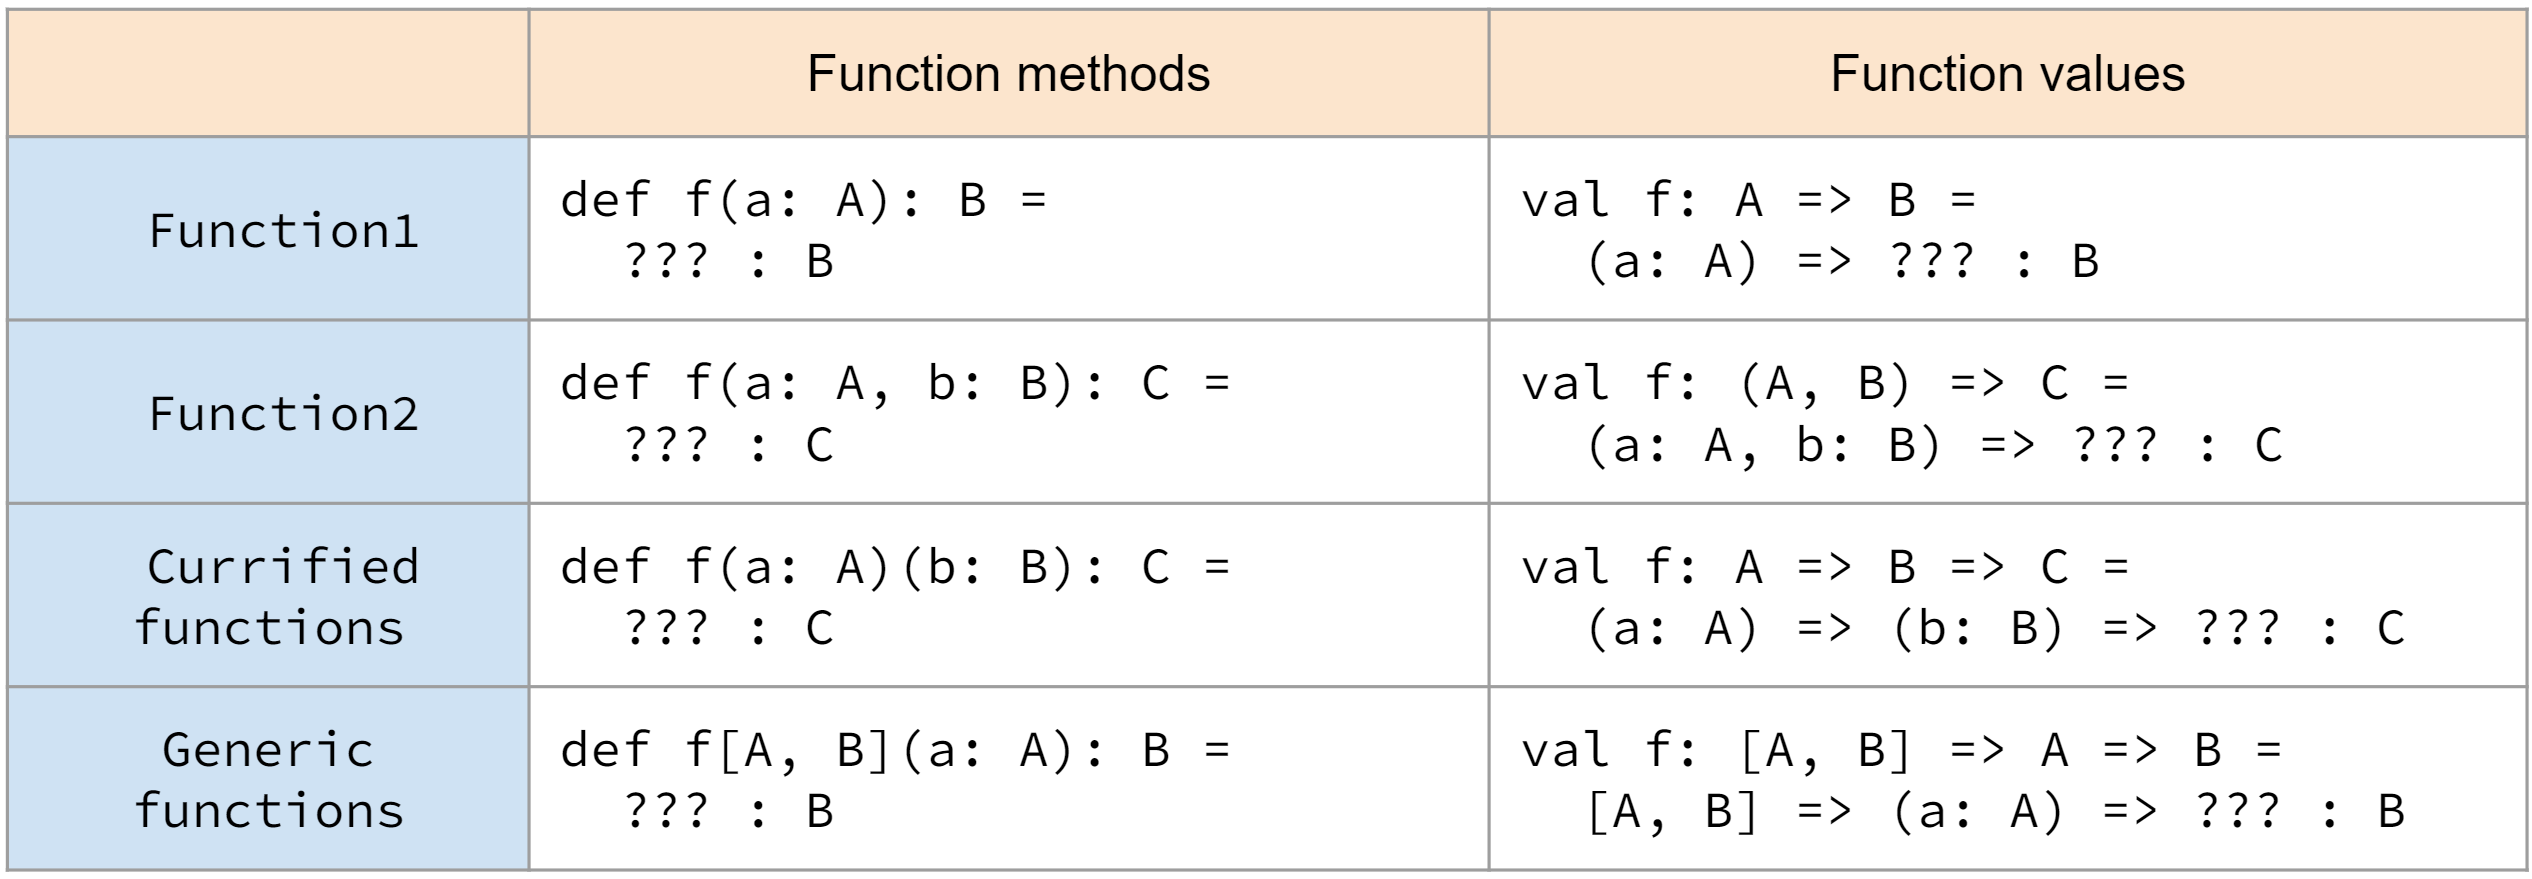

#### Exercise
<div class="alert alert-info">
    There is a function which behaves as the identity element with respect to the operation `compose`, i.e. no matter which other function we choose to compose with the [`identity`](https://www.scala-lang.org/api/current/scala/Predef$.html) function, the result will be that function:
    
1. `identity[B] compose f == f` for all `f: A => B`
2. `f compose identity[A] == f` for all `f: A => B`
    
Implement the <code>identity</code> function both as a polymorphic method and as a polymorphic function type.
</div>

##### Solution

In [ ]:
def identity[A](a: A): A = a

or using lambda expressions:

In [ ]:
val identity: [A] => A => A = 
    [A] => (a: A) => a

##### Your solution

In [ ]:
// write you solution here

## Exponent types

In general, types may be regarded as sets of values. For instance, primitive types may be defined as follows:
* `Boolean = {false, true}`
* `Int = {..., -2, -1, 0, 1, 2, ...}`
* etc. 

Given a type $A$, we can thus talk about its cardinality $|A|$, i.e. the number of elements they are made of. For instance:
* $|Boolean|=2$
* $|Int|=2^{32}$

What about about complex types like functions? Given types $A$ and $B$, how many functions are there of type $A => B$, i.e. which is the value of $|A => B|$. Let's consider how many functions are there of type `Boolean => Boolean`:

In [ ]:
// four functions


There are exactly four different functions of type `Boolean => Boolean`, and this is because a function is characterised as a mapping which assigns a single value for each possible input value. Since we have two possible input values of type Boolean, and for each of them we can choose one boolean value (we have two possibilities), the resulting number of different mappings, i.e. functions, is `2*2`.

In general, $|X\Rightarrow Y|=|Y|^{|X|}$, since for each input value of type $X$ we have $|Y|$ values available. This is the reason why function types are called _exponential types_.

This justifies calling functions _algebraic_ data types, but why are functions _data types_ at all? Shouldn't functions be characterised more precisely as _behaviour_, as it's done in object-oriented programming? As we already discussed, functions are special _values_ and, hence, data of a special type encoding certain information. In particular, the information is encoded in the form of a input-output mapping. 

Last, similarly to the other algebraic data types (products and sums), we can characterise functions from the point of view of its _constructors_ and _destructors_ (or _observers_). Constructors allow us to create or construct values of a given kind, whereas destructors allow us to extract or observe information encoded in that data type. In the particular case of function types, the *only* way to create a function (value) is through lambda expressions, and the only way to extract information from a function is to apply that function to a given input value. 

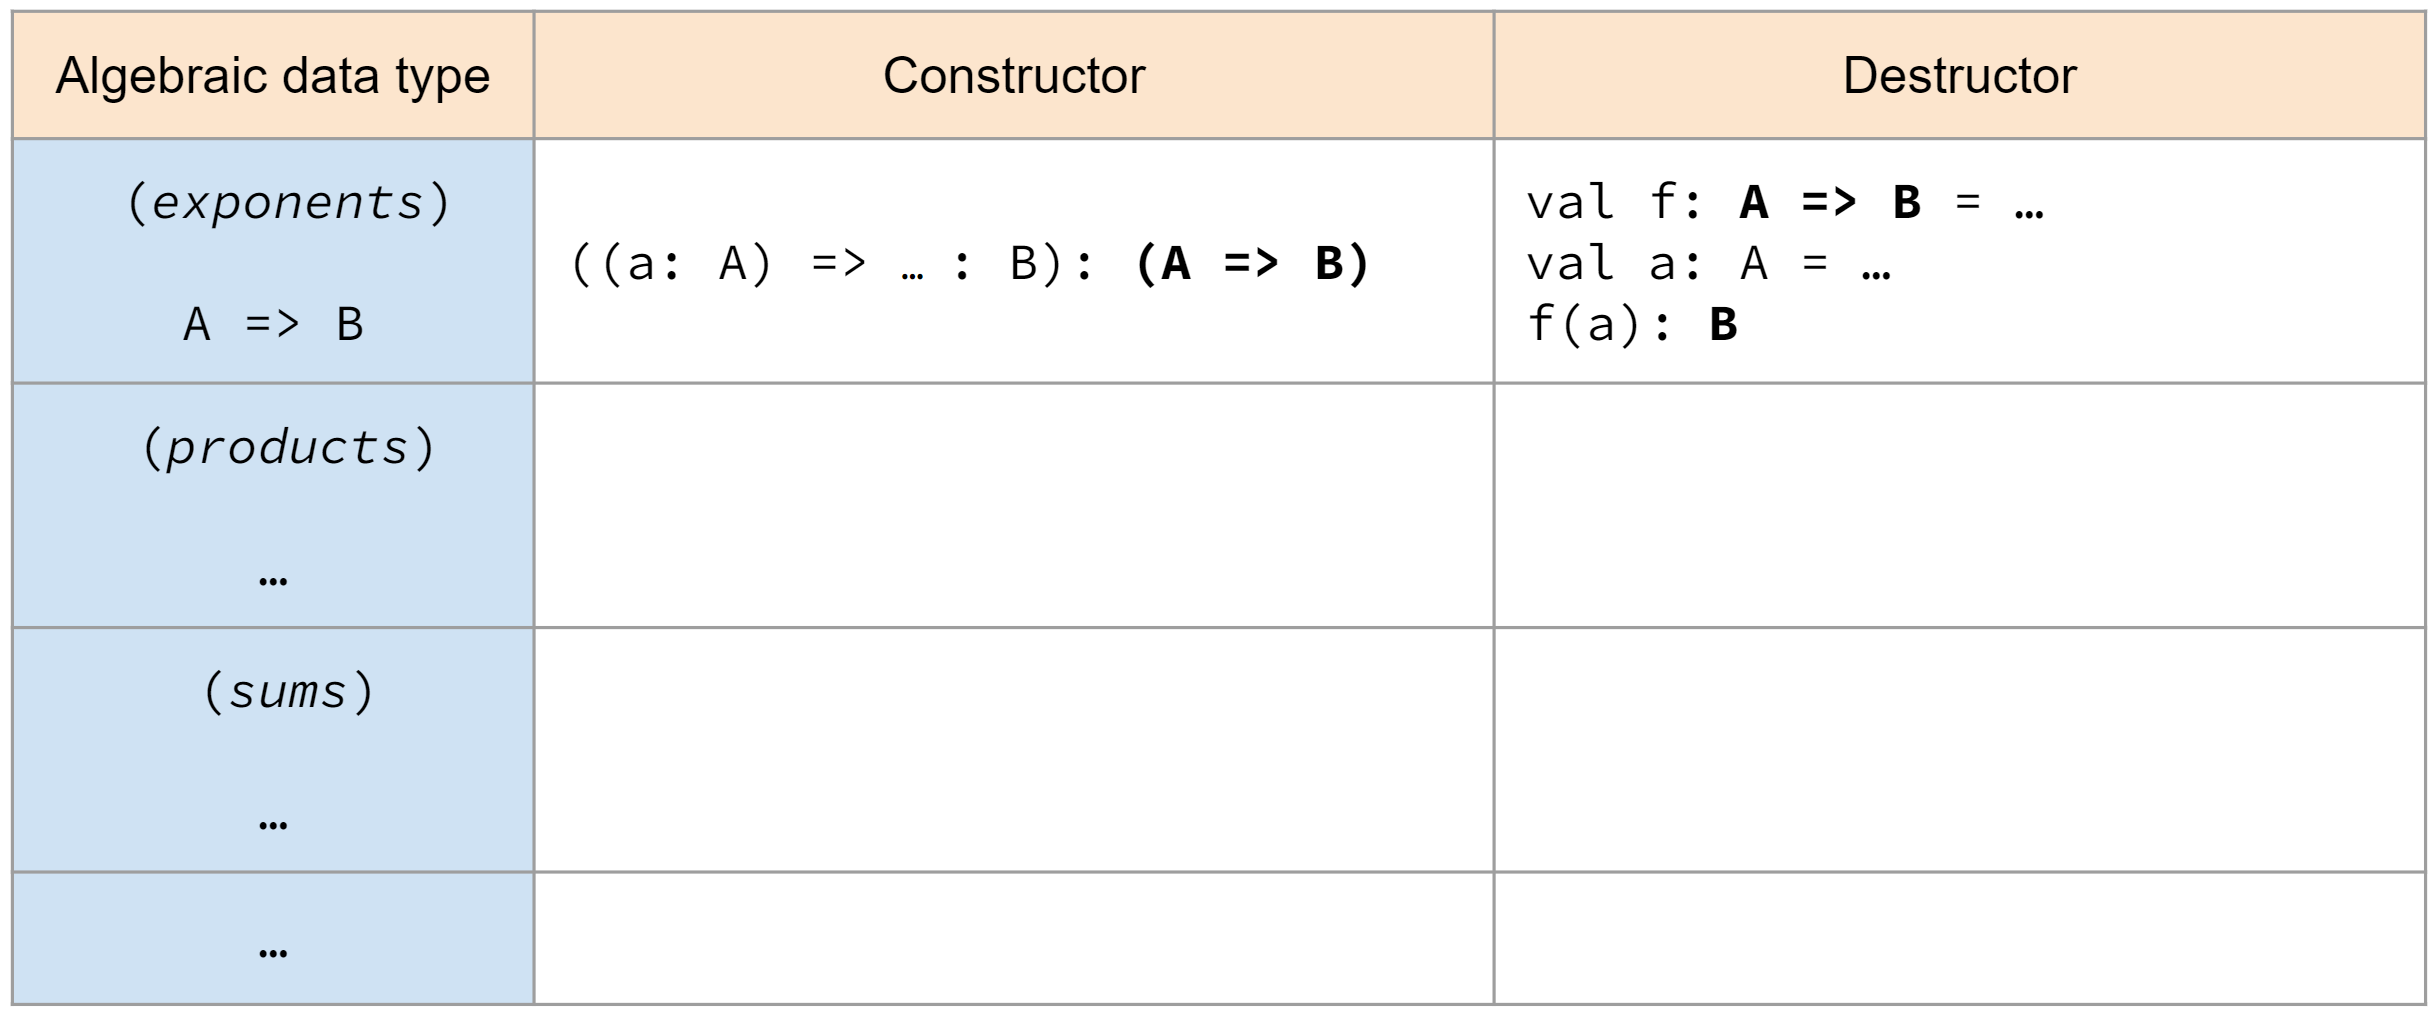

#### Exercise
<div class="alert alert-info">
    How many functions are there of type <code>(Boolean, Boolean, Boolean) => Boolean</code>? Write two of them.
</div>

##### Solution

The function `(Boolean, Boolean, Boolean) => Boolean` is equivalent to its curried form `Boolean => (Boolean => (Boolean => Boolean))`. The number of values of this type is:

$|Boolean => (Boolean => (Boolean => Boolean))| = \\
    |Boolean => (Boolean => Boolean)|^{|Boolean|} = \\
    (|Boolean => Boolean|^{|Boolean|})^{|Boolean|} = \\
    ((|Boolean|^{|Boolean|})^{|Boolean|})^{|Boolean|} = \\
    |Boolean|^{|Boolean|*|Boolean|*|Boolean|} = \\
    2^{2*2*2} = \\
    256$
    

In [ ]:
val f1: (Boolean, Boolean, Boolean) => Boolean = 
    (b1: Boolean, b2: Boolean, b3: Boolean) => false

In [ ]:
val f2: (Boolean, Boolean, Boolean) => Boolean = 
    (b1: Boolean, b2: Boolean, b3: Boolean) => true

##### Your solution

In [ ]:
// write you solution here

## Syntactic sugar for function-values

We discuss now some syntactic facilities offered by Scala when writing lambda expressions. 

First, we can omit the types of input arguments and let Scala figure out them:

In [ ]:
val addOneV: Int => Int = 
    ???

val substractOneV: Int => Int = 
    ???

Second, we can get extra level of conciseness using so-called _underscore_ syntax:

In [ ]:
val addOne: Int => Int = 
    ???

In [ ]:
val times: (Int, Int) => Int = 
    ???

In [ ]:
// `call` invocation using underscore notation


This kind of syntactic sugar also applies to functions of more than one argument: 

In [ ]:
val sum: (Int, Int) => Int = 
    ???

#### Exercise
<div class="alert alert-info">
    Write the following function using underscore syntax.
</div>

In [ ]:
val f1: (Boolean, Boolean, Boolean) => Boolean = 
    (b1: Boolean, b2: Boolean, b3: Boolean) => b1 && b2 || b3

##### Solution

In [ ]:
val f1: (Boolean, Boolean, Boolean) => Boolean = 
    _ && _ || _

##### Your solution

In [ ]:
// write you solution here

## Appendix: How are functions represented as values in Scala

Now, we just want to focus on how are functions actually represented as values in a OO language like Scala. This representation builds essentially upon methods, in particular, _reified_ methods. For instance, let's consider the following functions:

In [ ]:
def addOneM(number: Int): Int = 
    number + 1

def substractOneM(number: Int): Int = 
    number - 1 

In order to create a type of functions that receive an integer and return another one, we can create a new class whose only method is the function that we want to actually implement:

In [ ]:
// abstract class FunctionInt2Int


Now, we can implement the `call` HOF as follows: 

In [ ]:
def call(int2int: Int => Int, number: Int): Int = 
    ???

In order to use this HOF with the `addOneM` and `substractOneM` functions, we must create reified versions for them: 

In [ ]:
val addOneV: FunctionInt2Int = ???

val substractOneV: FunctionInt2Int = ???

Or, alternatively, we can also create instances using `object` declarations: 

In [ ]:
// object addOneV extends FunctionInt2Int:

// object substractOneV extends FunctionInt2Int:



We call the `addOneV` and `substractOneV` function-values, i.e. functions represented as values. Now, we can use the `call` HOF as follows:

In [ ]:
// `call` invocations


Actually, function types such as `Int => Int` and `Boolean => String` are syntactic sugar for the types `Function1[Int, Int]` and `Function1[Boolean, String]`, where [`Function1`](https://www.scala-lang.org/api/current/scala/Function1.html) is a generalization of the type `FunctionInt2Int` that we wrote above. We have also [`Function2`](https://www.scala-lang.org/api/current/scala/Function2.html), [`Function3`](https://www.scala-lang.org/api/current/scala/Function3.html), etc., that are roughly implemented as follows:

In [ ]:
object Std:
    // Standard Function1 and Function2



Using these standard classes, we can create the `addOneV` function-value in a similar way than before: 

In [ ]:
// addOneV using standard Function1 vals



or using `object` declarations: 

In [ ]:
// addOneV using standard function1 objects


and invoke functions as follows:


In [ ]:
// addOneV invocations explicitly using `apply`


However, as we saw throughout this notebook, we can also invoke the function without explicitly naming the `apply` method, i.e. 

In [ ]:
// without `apply`


This is just another syntactic nicety of Scala. In sum, in an object-oriented language like Scala, function-values are ultimately methods in disguise.